# Polarized Fractal Efficiency (PFE)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()

I've put the code for the PFE indicator and for the running of the backtests in a separate file to keep things tidy

In [2]:
from indicators import PFE
from backtest import run_backtest

The Dax futures price data from the excel is saved in dax_futures.csv, it's easy to pull this data into the notebook so that we can use it.

In [3]:
df = pd.read_csv('dax_futures.csv', parse_dates=True, index_col='Date')
df.index.name = None

In [4]:
df.head() # this gives a quick view of the data so that we can check that its loaded ok. 

,Open,High,Low,Close
1999-12-30,8863.5,8935.5,8853.5,8930.5
2000-01-03,9091.5,9113.5,8670.5,8708.0
2000-01-04,8703.5,8703.5,8459.5,8533.5
2000-01-05,8370.5,8525.5,8366.5,8435.5
2000-01-06,8427.5,8480.5,8341.0,8409.0


Lets plot the full history of the Close prices to make sure the data is ok

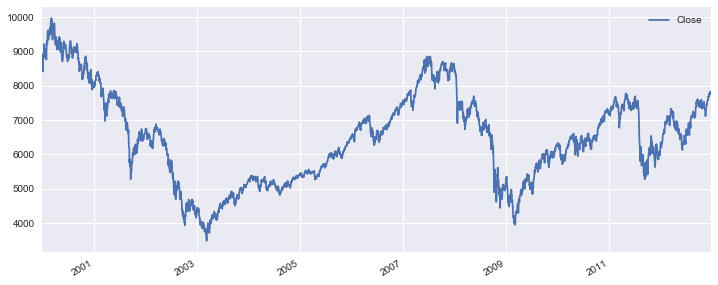

In [5]:
df.Close.plot(figsize=(12,5), legend=True);

We will create a couple of lists to hold our in-sample and out-of-sample years

In [6]:
years_in_sample = [2001, 2002, 2003, 2004, 2005, 2007, 2009, 2011]
years_out_sample = [2006, 2008, 2010, 2012]

Before moving on to optimizing, I'll run a single backtest to make sure everything works.

In [7]:
daily_pnl, sharpe_ratio, sharpe_ratio_summary = run_backtest(price_data=df, indicator=PFE, lookback=20, start_date='2001-01-01',
                                              years=years_in_sample)

print("Sharpe Ratio:", sharpe_ratio)

Sharpe Ratio: 0.55


In [8]:
sharpe_ratio_summary.T

,2001,2002,2003,2004,2005,2007,2009,2011
Sharpe Ratio,1.3563,1.1141,0.5654,0.7748,-0.1971,0.4568,0.3637,-0.0111


We can also sense check things by looking at a few simple statistics

In [9]:
daily_pnl.describe()

count     2036.000000
mean        93.434519
std       2679.853902
min     -11602.500000
25%      -1366.730000
50%         78.750000
75%       1452.500000
max      14577.500000
dtype: float64

A histogram can also provide a good high level summary

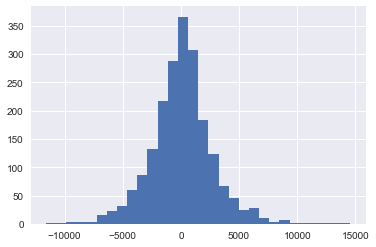

In [10]:
daily_pnl.hist(bins=30);

## Optimization of the lookback period

First we will create a range of lookback periods to test and an empty list to store the results i.e. the in-sample Sharpe ratio for each lookback.

In [11]:
lookbacks = range(30, 130)
sharpe_ratios = []

To actually do the optimization we can just create a simple for loop.

(note: this will take a couple of minutes to run)

In [12]:
for n in lookbacks:
    daily_pnl, sharpe_ratio, sharpe_ratio_summary = run_backtest(price_data=df, indicator=PFE, lookback=n, 
                                                                 start_date='2001-01-01', years=years_in_sample)
    sharpe_ratios.append(sharpe_ratio)

Let's recreate the plot from excel so that we can easily view the results

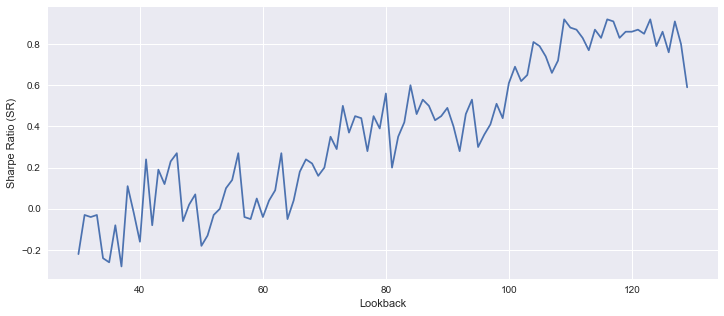

In [13]:
plt.figure(figsize=(12,5))
plt.plot(lookbacks, sharpe_ratios)
plt.ylabel('Sharpe Ratio (SR)')
plt.xlabel('Lookback')
plt.show()

## In-sample and out-of-sample results for the optimized lookback

In [14]:
n = 84 # the optimized lookback

#### In-sample results

we set years=years_in_sample in the run_backtest() function

In [15]:
daily_pnl, sharpe_ratio, sharpe_ratio_summary = run_backtest(price_data=df, indicator=PFE, lookback=n, start_date='2001-01-01',
                                              years=years_in_sample)

In [16]:
sharpe_ratio

0.6

In [17]:
sharpe_ratio_summary.T

,2001,2002,2003,2004,2005,2007,2009,2011
Sharpe Ratio,0.5224,0.987,1.2919,0.0948,1.2653,-0.0824,0.7198,-0.0276


#### Out-of-sample results

we set years=years_out_sample in the run_backtest() function

In [18]:
daily_pnl, sharpe_ratio, sharpe_ratio_summary = run_backtest(price_data=df, indicator=PFE, lookback=n, start_date='2001-01-01',
                                              years=years_out_sample)

In [19]:
sharpe_ratio

0.52

In [20]:
sharpe_ratio_summary.T

,2006,2008,2010,2012
Sharpe Ratio,0.6427,0.7063,0.4157,0.322


### Let's finally use all of the data and plot the pnl of the startegy

In [21]:
daily_pnl, sharpe_ratio, sharpe_ratio_summary = run_backtest(price_data=df, indicator=PFE, lookback=n, start_date='2001-01-01')

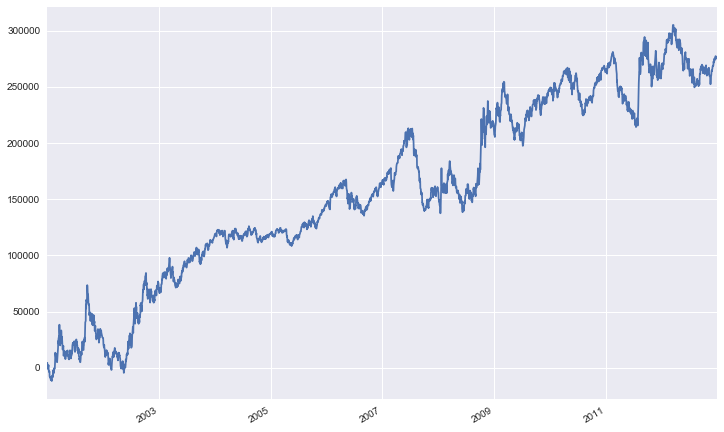

In [23]:
daily_pnl.cumsum().plot(figsize=(12,8));